In [1]:
import json
import os

from groq import Groq
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

# Dunning kruger effect


In [62]:
history = [{'human': 'sql databases', 'AI': '{\n  "confidence": 6,\n  "tone": "Assertive",\n  "feedback": "Good job getting started with databases!",\n  "follow_up_question": "Let\'s dive into more complex queries; when would you use a LEFT JOIN over an INNER JOIN?",\n  "expected_output": "A LEFT JOIN returns all records from the left table, and the matched records from the right table; an INNER JOIN returns records that have matching values in both tables."\n}'}, {'human': 'if you want to use a leftist point of view', 'AI': '{\n  "confidence": 6,\n  "tone": "Assertive",\n  "feedback": "Great progress starting with databases!",\n  "follow_up_question": "Can you explain the difference between using a LEFT JOIN and an INNER JOIN from a leftist perspective?",\n  "expected_output": "From a leftist perspective, a LEFT JOIN prioritizes the left table, returning all its records and the matched records from the right table, while an INNER JOIN focuses on the intersection of both tables."\n}'}]
history.append({'human': 'sql datalalala', 'AI': '{\n  "confidence": 6,\n  "tone": "Assertive",\n  "feedback": "Good job getting started with databases!",\n  "follow_up_question": "Let\'s dive into more complex queries; when would you use a LEFT JOIN over an INNER JOIN?",\n  "expected_output": "sql lalalala."\n}'})
history.append({'human': 'sql datalalala', 'AI': '{\n  "confidence": 6,\n  "tone": "Assertive",\n  "feedback": "Good job getting started with databases!",\n  "follow_up_question": "Let\'s dive into more complex queries; when would you use a LEFT JOIN over an INNER JOIN?",\n  "expected_output": "A LEFT JOIN returns all records from the left table, and the matched records from the right table; an INNER JOIN returns records that have matching values in both tables."\n}'})

In [69]:
import json
import os

from groq import Groq
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

def get_similarity_rating(human_msg, ai_msg):
    from groq import Groq

    client = Groq(
        api_key='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',
    )

    system_prompt = '''you are a jury rating on a scale from 0 to 10 the similarity in meaning of the two sentences that i am going to give you. Your aim is only to output a number between 0 and 10.
    INSTRUCTIONS: You will output the rating in the following pattern: "0-10".
    
    EXAMPLE:
        user_input: Sentence 1): i like apples ; Sentence 2): the sky is blue
        ideal_output: 0
    IMPORTANT: The output must be a number between 0 and 10 in the pattern "0". '''

    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": system_prompt
            },
            {
                "role": "user",
                "content": "Sentence 1): " + human_msg + " Sentence 2): " + ai_msg
            }
        ],
        model="mixtral-8x7b-32768",
        max_tokens=3,
    )

    return int(chat_completion.choices[0].message.content)


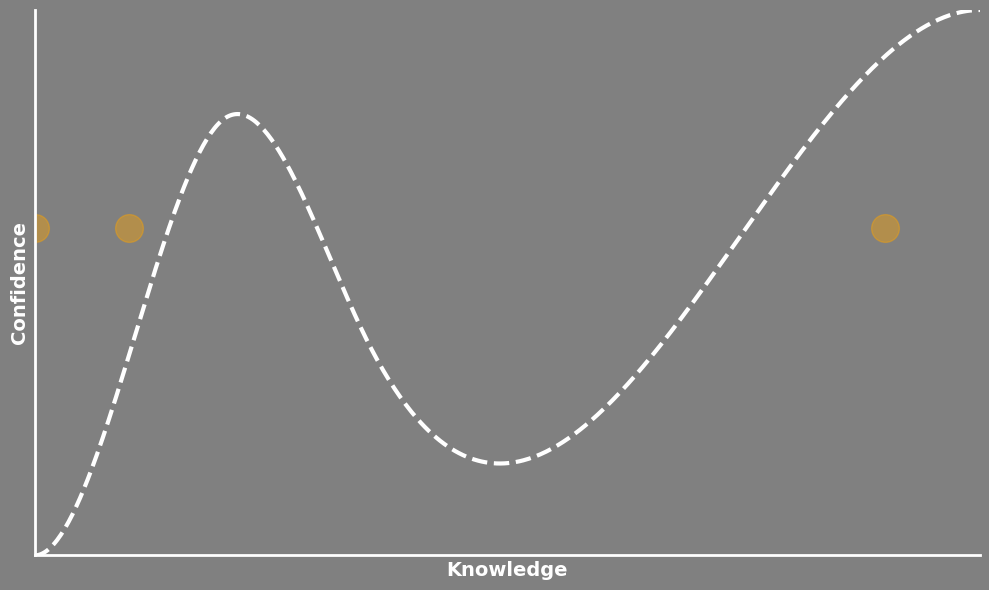

In [70]:




def plot_DK_curve(history):
    # Define the points
    x_points = np.array([0, 2, 3.5, 10])
    y_points = np.array([0, 8, 4, 10])

    # Create a cubic spline interpolation
    cspl = CubicSpline(x_points, y_points, bc_type='clamped')

    # Generate x values for the full range
    x = np.linspace(0, 10, 500)
    y = cspl(x)

    # Ensure the y values stay within the range [0, 10]

    dk_dict = {"rating": [], "confidence": []}
    for i in range(len(history)-1):
        human_msg = history[i+1]['human']
        ai_msg = json.loads(history[i]['AI'])["expected_output"]
        rating = get_similarity_rating(human_msg, ai_msg)
        dk_dict['rating'].append(int(rating))
        confidence = json.loads(history[i+1]['AI'])["confidence"]
        dk_dict['confidence'].append(int(confidence))

    # Plotting
    plt.figure(figsize=(10, 6),facecolor='gray')
    plt.plot(dk_dict['rating'], dk_dict['confidence'], 'o', color='orange', markersize=20, alpha=0.4)
    plt.plot(x, y, '--',color='white',linewidth=3)

    # Customizing the plot
    plt.gca().set_facecolor('gray')
    plt.gca().spines['top'].set_color('none')
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['left'].set_color('white')
    plt.gca().spines['left'].set_linewidth(2)
    plt.gca().spines['bottom'].set_color('white')
    plt.gca().spines['bottom'].set_linewidth(2)
    plt.gca().tick_params(axis='x', colors='white')
    plt.gca().tick_params(axis='y', colors='white')
    plt.gca().xaxis.label.set_color('white')
    plt.gca().xaxis.label.set_fontsize(14)
    plt.gca().yaxis.label.set_fontsize(14)
    plt.gca().yaxis.label.set_color('white')
    plt.gca().title.set_color('darkgray')

    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.xlabel('Knowledge', weight='bold')
    plt.ylabel('Confidence', weight='bold')
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.savefig('./DK_curve.png', facecolor='darkgray')

 

plot_DK_curve(history)
    

# plotting confidence over time


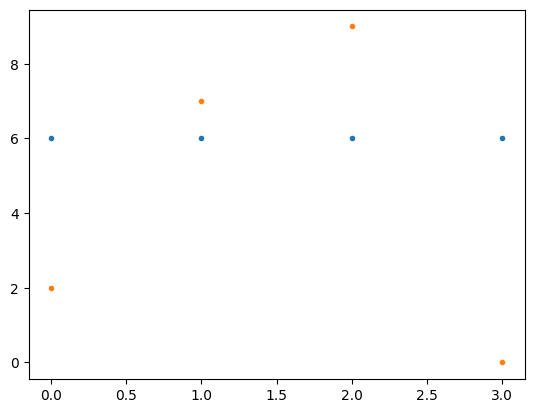

In [71]:
def retrieve_confidence(history):
    confidence = []
    for i in range(len(history)):
        confidence.append(int(json.loads(history[i]['AI'])["confidence"]))
    return confidence
plt.plot(retrieve_confidence(history),'.')

def retrieve_rating(history):
    rating = []
    for i in range(len(history)):
        rating.append(get_similarity_rating(history[i]['human'], json.loads(history[i]['AI'])["expected_output"]))
    return rating
plt.plot(retrieve_rating(history),'.')